In [1]:
import numpy as np
yield_data = np.genfromtxt ('../gbp_noheader.in', delimiter="\t", dtype=None, encoding="utf8")

In [65]:
tr = yield_data[:4000]
train_x = tr[::2]
train_y = tr[1::2]
val = yield_data[4000:-1]
val_x = val[::2]
val_y = val[1::2]

In [66]:
import torch

dtype = torch.float
device = torch.device("cpu")

In [67]:
N, D_in, H, D_out = 2000, 7, 14, 7

In [68]:
x = torch.from_numpy(train_x).float()
y = torch.from_numpy(train_y).float()

xval = torch.from_numpy(val_x).float()
yval = torch.from_numpy(val_y).float()

In [69]:
modelf = torch.nn.Sequential(
    torch.nn.Linear(7, 20),
    torch.nn.Sigmoid(),
    torch.nn.Linear(20, 7),
    torch.nn.Sigmoid()
)
#print(modelf)
learning_rate = 1e-2
optimizer = torch.optim.SGD(modelf.parameters(), lr=learning_rate, momentum=0.9)
lossMSE = torch.nn.MSELoss()

In [70]:
train_res = []
for t in range(500):
    optimizer.zero_grad()
    net_out = modelf(x)
    loss = lossMSE(net_out, y)
    loss.backward()
    optimizer.step()
    
    #print(t, loss.data[0].item())
    
    val_pred = modelf(xval)
    val_loss = lossMSE(val_pred, yval)
    
    train_res.append([t,loss.item(), val_loss.item()])



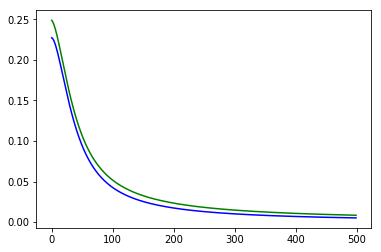

In [80]:

import matplotlib.pyplot as plt
xs = [x[0] for x in train_res]
ys = [x[1] for x in train_res]
val = [x[2] for x in train_res]
plt.figure()

plt.plot(xs, ys, color = 'blue')
plt.plot(xs, val, color = 'green')
plt.show()

In [9]:
#class way to define a model

import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(7, 20)
        #self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 7)
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return torch.sigmoid(x)
        #return x
net = Net()
print(net)
learning_rate = 1e-1
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
lossMSE = torch.nn.MSELoss()

Net(
  (fc1): Linear(in_features=7, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=7, bias=True)
)
